# Question 1: Time-series prediction






Prediction can be divided into two categories: regression and classification. In regression, the numerical value of the next days is predicted for a time series. In the classification, the upward or downward trend of the time series is predicted for the next few days.

In this question, you will learn about regression mode and implement a part of:
https://ieeexplore.ieee.org/document/9005997

## Import libraries

In [48]:
!pip install --upgrade mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 892.8 kB/s eta 0:00:00


In [142]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import datetime
from datetime import datetime
import yfinance as yf
import mplfinance as mpf

import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split

## 1.1- Download data

In [2]:
table = pd.read_html('https://en.wikipedia.com/wiki/List_of_S%26P_500_companies')
table[0]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [3]:
New_table = table[0]

In [4]:
New_table_2 = New_table[[ datetime.strptime(dt, '%Y-%m-%d') < datetime(2010,1,1) for dt in New_table['Date added'] ] ]
New_table_2

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
...,...,...,...,...,...,...,...,...
495,WYNN,Wynn Resorts,Consumer Discretionary,Casinos & Gaming,"Paradise, Nevada",2008-11-14,1174922,2002
496,XEL,Xcel Energy,Utilities,Multi-Utilities,"Minneapolis, Minnesota",1957-03-04,72903,1909
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [33]:
My_Tickers = New_table_2['Symbol'].tolist()

if 'BF.B' in My_Tickers:
    My_Tickers.remove('BF.B')

My_Tickers


['MMM',
 'ABT',
 'ADBE',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AMP',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'ADM',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BBY',
 'BIIB',
 'BA',
 'BKNG',
 'BXP',
 'BSX',
 'BMY',
 'CPB',
 'COF',
 'CAH',
 'CCL',
 'CAT',
 'CBRE',
 'COR',
 'CNP',
 'CF',
 'CHRW',
 'SCHW',
 'CVX',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'GLW',
 'COST',
 'CTRA',
 'CSX',
 'CMI',
 'CVS',
 'DHR',
 'DRI',
 'DVA',
 'DE',
 'XRAY',
 'DVN',
 'DFS',
 'DOV',
 'DHI',
 'DTE',
 'DUK',
 'EMN',
 'ETN',
 'EBAY',
 'ECL',
 'EIX',
 'EA',
 'ELV',
 'LLY',
 'EMR',
 'ETR',
 'EOG',
 'EFX',
 'EQR',
 'EL',
 'ES',
 'EXC',
 'EXPE',
 'EXPD',
 'XOM',
 'FAST',
 'FDX',
 'FIS',
 'FITB',
 'FE',
 'FI',
 'FMC',
 'F',
 'BEN',
 'GEN',
 'GD',
 'GE',
 'GIS',
 'G

In [34]:
Raw_price_for_my_tickers = yf.download(tickers=My_Tickers, start="2010-01-04", interval="1d", group_by="ticker")


[*********************100%%**********************]  290 of 290 completed


In [35]:
Raw_price_for_my_tickers

WYNN                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2010-01-04  61.240002  64.150002  60.919998  63.959999  41.636860  4741400   
2010-01-05  65.180000  68.330002  64.949997  67.849998  44.169178  5644300   
2010-01-06  67.070000  68.160004  66.400002  66.959999  43.589813  2738800   
2010-01-07  66.480003  68.480003  66.080002  68.389999  44.520710  2388500   
2010-01-08  67.690002  68.389999  67.129997  67.900002  44.201744  1539800   
...               ...        ...        ...        ...        ...      ...   
2023-12-06  82.870003  83.959999  82.029999  82.400002  82.400002  2340000   
2023-12-07  82.400002  83.480003  82.339996  82.529999  82.529999  1804800   
2023-12-08  82.349998  84.220001  82.320000  84.190002  84.190002  2344800   
2023-12-11  84.330002  86.260002  84.330002  86.000000  86.000000  1973900   
2023-12-12  86.209999  86.500000  85.529999  86.230003  86.230003  1312600   

                  VRSN                                      ...         WY  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2010-01-04   24.559999   24.870001   24.290001   24.740000  ...  43.439999   
2010-01-05   24.790001   25.139999   24.500000   25.000000  ...  43.689999   
2010-01-06   24.900000   25.070000   24.650000   24.730000  ...  43.950001   
2010-01-07   24.700001   24.740000   24.280001   24.389999  ...  43.759998   
2010-01-08   24.330000   24.690001   24.309999   24.580000  ...  43.700001   
...                ...         ...         ...         ...  ...        ...   
2023-12-06  216.460007  218.210007  215.399994  215.979996  ...  31.219999   
2023-12-07  216.179993  216.789993  214.440002  214.589996  ...  30.830000   
2023-12-08  214.100006  215.270004  212.110001  212.970001  ...  30.570000   
2023-12-11  212.690002  214.270004  212.520004  213.990005  ...  30.639999   
2023-12-12  214.850006  217.119995  213.839996  216.809998  ...  30.540001   

                                                  NI                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2010-01-04  44.279999  10.005537  1832400   6.113949   6.165029   6.062868   
2010-01-05  45.220001  10.217942  1724500   6.110020   6.141454   6.019646   
2010-01-06  44.720001  10.104955  2254400   6.082515   6.098232   5.972495   
2010-01-07  44.520000  10.059767  1420700   5.992141   6.011788   5.897839   
2010-01-08  44.110001   9.967121  1310000   5.893910   5.944990   5.842829   
...               ...        ...      ...        ...        ...        ...   
2023-12-06  31.240000  31.240000  3170900  26.320000  26.430000  26.180000   
2023-12-07  30.889999  30.889999  2976600  26.500000  26.750000  26.379999   
2023-12-08  30.870001  30.870001  2799500  26.440001  26.480000  26.090000   
2023-12-11  31.080000  31.080000  2783100  26.190001  26.440001  26.150000   
2023-12-12  30.660000  30.660000  4740100  26.389999  26.420000  26.100000   

                                            
                Close  Adj Close    Volume  
Date                                        
2010-01-04   6.094303   3.754158   6905603  
2010-01-05   6.078585   3.744475   8784322  
2010-01-06   6.007859   3.700908   7382791  
2010-01-07   5.933202   3.654917   7407223  
2010-01-08   5.901768   3.635552  15739298  
...               ...        ...       ...  
2023-12-06  26.410000  26.410000   4465900  
2023-12-07  26.430000  26.430000   4085900  
2023-12-08  26.299999  26.299999   4011700  
2023-12-11  26.340000  26.340000   3337100  
2023-12-12  26.180000  26.180000   3048300  

[3510 rows x 1740 columns]

In [36]:
Raw_price_for_my_tickers.head()

WYNN                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2010-01-04  61.240002  64.150002  60.919998  63.959999  41.636860  4741400   
2010-01-05  65.180000  68.330002  64.949997  67.849998  44.169178  5644300   
2010-01-06  67.070000  68.160004  66.400002  66.959999  43.589813  2738800   
2010-01-07  66.480003  68.480003  66.080002  68.389999  44.520710  2388500   
2010-01-08  67.690002  68.389999  67.129997  67.900002  44.201744  1539800   

                 VRSN                                   ...         WY  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2010-01-04  24.559999  24.870001  24.290001  24.740000  ...  43.439999   
2010-01-05  24.790001  25.139999  24.500000  25.000000  ...  43.689999   
2010-01-06  24.900000  25.070000  24.650000  24.730000  ...  43.950001   
2010-01-07  24.700001  24.740000  24.280001  24.389999  ...  43.759998   
2010-01-08  24.330000  24.690001  24.309999  24.580000  ...  43.700001   

                                                 NI                      \
                Close  Adj Close   Volume      Open      High       Low   
Date                                                                      
2010-01-04  44.279999  10.005537  1832400  6.113949  6.165029  6.062868   
2010-01-05  45.220001  10.217942  1724500  6.110020  6.141454  6.019646   
2010-01-06  44.720001  10.104955  2254400  6.082515  6.098232  5.972495   
2010-01-07  44.520000  10.059767  1420700  5.992141  6.011788  5.897839   
2010-01-08  44.110001   9.967121  1310000  5.893910  5.944990  5.842829   

                                          
               Close Adj Close    Volume  
Date                                      
2010-01-04  6.094303  3.754158   6905603  
2010-01-05  6.078585  3.744475   8784322  
2010-01-06  6.007859  3.700908   7382791  
2010-01-07  5.933202  3.654917   7407223  
2010-01-08  5.901768  3.635552  15739298  

[5 rows x 1740 columns]

In [37]:
Raw_price_for_my_tickers.columns

MultiIndex([('WYNN',      'Open'),
            ('WYNN',      'High'),
            ('WYNN',       'Low'),
            ('WYNN',     'Close'),
            ('WYNN', 'Adj Close'),
            ('WYNN',    'Volume'),
            ('VRSN',      'Open'),
            ('VRSN',      'High'),
            ('VRSN',       'Low'),
            ('VRSN',     'Close'),
            ...
            (  'WY',       'Low'),
            (  'WY',     'Close'),
            (  'WY', 'Adj Close'),
            (  'WY',    'Volume'),
            (  'NI',      'Open'),
            (  'NI',      'High'),
            (  'NI',       'Low'),
            (  'NI',     'Close'),
            (  'NI', 'Adj Close'),
            (  'NI',    'Volume')],
           length=1740)

## 2-1. Exploring time series data and familiarizing with famous theories and libraries

#### Question 1: If the null data was at the beginning, what methods can be used to solve this problem?

If we had null data at the beginning of a time series and we want to handle it, there are several methods we can consider:

* Forward Fill (Pad): This method involves filling missing values with the last known value. This approach assumes that the future values will be similar to the most recent past values.
` Raw_price_for_my_tickers.ffill(inplace=True) `

* Backward Fill (Bfill): This method involves filling missing values with the next available value. Similar to forward fill, it assumes that the past values will be similar to the most recent future values.
`Raw_price_for_my_tickers.bfill(inplace=True)`

* Interpolation: Interpolation is a method where missing values are estimated based on the values around them. There are different interpolation methods available, such as linear interpolation, polynomial interpolation, etc.
`Raw_price_for_my_tickers.interpolate(method='linear', inplace=True)`

* Replace with a Constant: You can replace with cons values.
`Raw_price_for_my_tickers.fillna(value=0, inplace=True)`

#### Question 2: If we have null value data in the middle or at the end of the time series, how do we solve it?


If we have null values in the middle or at the end of a time series, we can use similar methods to handle the missing data. Here are some common approaches:

There are several methods to handle missing values in time series data, including:

* Interpolation: This method replaces missing values with estimates based on the values of surrounding time points. Common interpolation methods include linear interpolation and spline interpolation.

* Extrapolation: This method extends the time series data beyond the existing data points by using mathematical models to estimate missing values.

* Forward-fill and backward-fill: In forward-fill, missing values are filled in with the next available value. In backward-fill, missing values are filled in with the previous available value.

* Last Observation Carried Forward (LOCF): This method replaces missing values with the last observed value.

* Multiple imputation: This method uses statistical methods to generate multiple estimates for missing values and then combines the results to produce a single estimate.

In [38]:
print(Raw_price_for_my_tickers.isna().sum())


WYNN  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
                  ..
NI    High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
Length: 1740, dtype: int64


Of course, some of the weekdays might be public holidays in which case no price will be available. For this reason, we will fill the missing prices with the latest available prices

In [46]:
Raw_price_for_my_tickers.fillna(method='ffill', inplace=True)
Raw_price_for_my_tickers = Raw_price_for_my_tickers.fillna(method='ffill')
print(Raw_price_for_my_tickers.isna().sum())


WYNN  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
                  ..
NI    High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
Length: 1740, dtype: int64


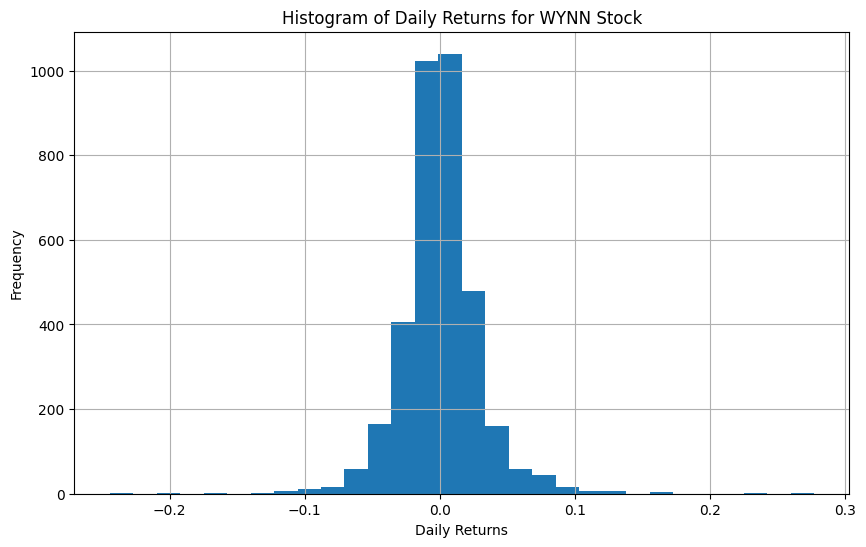

In [45]:
plt.figure(figsize=(10, 6))
( Raw_price_for_my_tickers['WYNN']['Close'].pct_change()).hist(bins=30)
plt.title('Histogram of Daily Returns for WYNN Stock')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

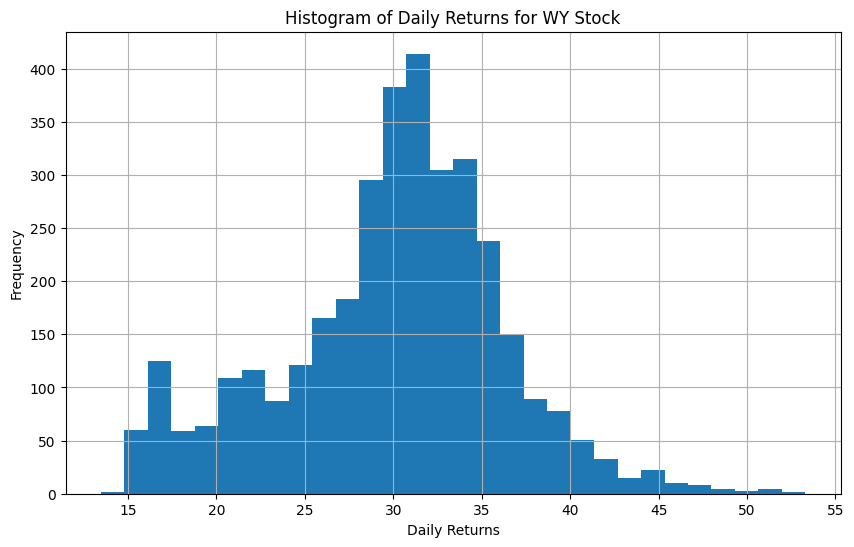

In [44]:
plt.figure(figsize=(10, 6))
(Raw_price_for_my_tickers['WY']['Close']).hist(bins=30)
plt.title('Histogram of Daily Returns for WY Stock')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

According to the Random walks theory, prediction of next days stock closing price is not dependent to anything and it can goes up or down. Based on out plots we can see that if we relay on the previos day for out prediction and getting the trend downward or upward from the charts trend we can get high accuraccy because of the semi-normal values.



So in the marketing data if we look too backward we might get incorrect data and it is better to look a few days before what day we want to predict.

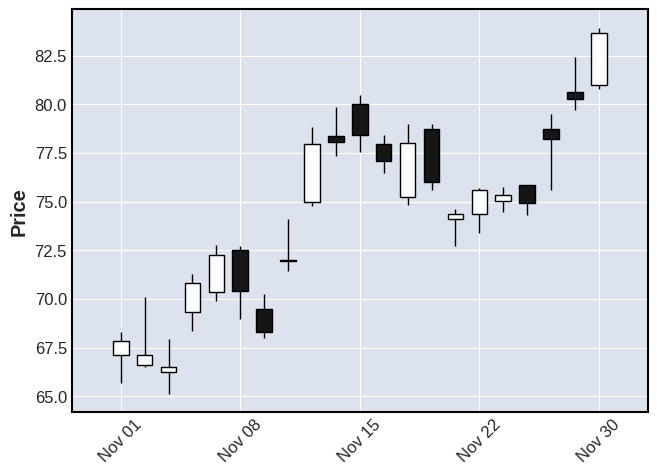

In [59]:
wynn_data = Raw_price_for_my_tickers['WYNN']
wynn_data_november = wynn_data['2022-11-01':'2022-11-30']

mpf.plot(wynn_data_november, type='candle')


## 3-1. TimeSeriesSplit

here we only keep:
selected_tickers = ['AMZN', 'MSFT', 'AAPL', 'META', 'GOOGL']


In [147]:
tickers_to_download = ['GOOGL']
additional_data_google = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['META']
additional_data_META = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['AMZN']
additional_data_AMZN = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['MSFT']
additional_data_MSFT = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['AAPL']
additional_data_AAPL = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [148]:
additional_data_google = additional_data_google.interpolate(method='linear')
additional_data_META = additional_data_META.interpolate(method='linear')
additional_data_AMZN = additional_data_META.interpolate(method='linear')
additional_data_MSFT = additional_data_META.interpolate(method='linear')
additional_data_AAPL = additional_data_META.interpolate(method='linear')


In [133]:
additional_data_google


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...
2023-12-06,131.440002,131.839996,129.880005,130.020004,130.020004,23576200
2023-12-07,135.039993,138.559998,134.699997,136.929993,136.929993,56767100
2023-12-08,134.199997,136.399994,134.029999,134.990005,134.990005,32233900


In [134]:
additional_data_META

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2023-12-06,321.929993,322.250000,317.040009,317.450012,317.450012,11294300
2023-12-07,317.769989,328.239990,317.769989,326.589996,326.589996,15905100
2023-12-08,323.089996,333.170013,323.000000,332.750000,332.750000,14077500


In [137]:
combined_data = pd.concat([additional_data_google, additional_data_META], axis=1, keys=['GOOGL', 'META'])
combined_data

GOOGL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2010-01-04   15.689439   15.753504   15.621622   15.684434   15.684434   
2010-01-05   15.695195   15.711712   15.554054   15.615365   15.615365   
2010-01-06   15.662162   15.662162   15.174174   15.221722   15.221722   
2010-01-07   15.250250   15.265265   14.831081   14.867367   14.867367   
2010-01-08   14.814815   15.096346   14.742492   15.065566   15.065566   
...                ...         ...         ...         ...         ...   
2023-12-06  131.440002  131.839996  129.880005  130.020004  130.020004   
2023-12-07  135.039993  138.559998  134.699997  136.929993  136.929993   
2023-12-08  134.199997  136.399994  134.029999  134.990005  134.990005   
2023-12-11  132.380005  133.339996  131.360001  133.289993  133.289993   
2023-12-12  131.809998  133.000000  131.259995  132.520004  132.520004   

                             META                                      \
               Volume        Open        High         Low       Close   
Date                                                                    
2010-01-04   78169752         NaN         NaN         NaN         NaN   
2010-01-05  120067812         NaN         NaN         NaN         NaN   
2010-01-06  158988852         NaN         NaN         NaN         NaN   
2010-01-07  256315428         NaN         NaN         NaN         NaN   
2010-01-08  188783028         NaN         NaN         NaN         NaN   
...               ...         ...         ...         ...         ...   
2023-12-06   23576200  321.929993  322.250000  317.040009  317.450012   
2023-12-07   56767100  317.769989  328.239990  317.769989  326.589996   
2023-12-08   32233900  323.089996  333.170013  323.000000  332.750000   
2023-12-11   31138000  329.399994  329.890015  320.000000  325.279999   
2023-12-12   28982900  324.600006  334.470001  324.559998  334.220001   

                                    
             Adj Close      Volume  
Date                                
2010-01-04         NaN         NaN  
2010-01-05         NaN         NaN  
2010-01-06         NaN         NaN  
2010-01-07         NaN         NaN  
2010-01-08         NaN         NaN  
...                ...         ...  
2023-12-06  317.450012  11294300.0  
2023-12-07  326.589996  15905100.0  
2023-12-08  332.750000  14077500.0  
2023-12-11  325.279999  25802500.0  
2023-12-12  334.220001  18462500.0  

[3510 rows x 12 columns]

In [156]:
selected_tickers = ['AMZN', 'MSFT', 'AAPL']
selected_data = Raw_price_for_my_tickers[selected_tickers]
#checking for null and nan
# nan_check = selected_data.isna().any()

# # Display the result
# print("NaN check for selected_data:")
# print(nan_check)

data_full_scaled_sp500 = pd.concat([selected_data, combined_data], axis=1)
data_full_scaled_sp500

AMZN                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2010-01-04    6.812500    6.830500    6.657000    6.695000    6.695000   
2010-01-05    6.671500    6.774000    6.590500    6.734500    6.734500   
2010-01-06    6.730000    6.736500    6.582500    6.612500    6.612500   
2010-01-07    6.600500    6.616000    6.440000    6.500000    6.500000   
2010-01-08    6.528000    6.684000    6.451500    6.676000    6.676000   
...                ...         ...         ...         ...         ...   
2023-12-06  147.580002  147.850006  144.279999  144.520004  144.520004   
2023-12-07  146.149994  147.919998  145.339996  146.880005  146.880005   
2023-12-08  145.479996  147.839996  145.399994  147.419998  147.419998   
2023-12-11  145.660004  146.190002  143.639999  145.889999  145.889999   
2023-12-12  145.520004  147.500000  145.300003  147.479996  147.479996   

                             MSFT                                      ...  \
               Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2010-01-04  151998000   30.620001   31.100000   30.590000   30.950001  ...   
2010-01-05  177038000   30.850000   31.100000   30.639999   30.959999  ...   
2010-01-06  143576000   30.879999   31.080000   30.520000   30.770000  ...   
2010-01-07  220604000   30.629999   30.700001   30.190001   30.450001  ...   
2010-01-08  196610000   30.280001   30.879999   30.240000   30.660000  ...   
...               ...         ...         ...         ...         ...  ...   
2023-12-06   39679000  373.540009  374.179993  368.029999  368.799988  ...   
2023-12-07   52352800  368.230011  371.450012  366.320007  370.950012  ...   
2023-12-08   41858000  369.200012  374.459991  368.230011  374.230011  ...   
2023-12-11   50907300  368.480011  371.600006  366.100006  371.299988  ...   
2023-12-12   44886600  370.850006  374.420013  370.459991  374.380005  ...   

                 GOOGL                                           META  \
                   Low       Close   Adj Close     Volume        Open   
Date                                                                    
2010-01-04   15.621622   15.684434   15.684434   78169752         NaN   
2010-01-05   15.554054   15.615365   15.615365  120067812         NaN   
2010-01-06   15.174174   15.221722   15.221722  158988852         NaN   
2010-01-07   14.831081   14.867367   14.867367  256315428         NaN   
2010-01-08   14.742492   15.065566   15.065566  188783028         NaN   
...                ...         ...         ...        ...         ...   
2023-12-06  129.880005  130.020004  130.020004   23576200  321.929993   
2023-12-07  134.699997  136.929993  136.929993   56767100  317.769989   
2023-12-08  134.029999  134.990005  134.990005   32233900  323.089996   
2023-12-11  131.360001  133.289993  133.289993   31138000  329.399994   
2023-12-12  131.259995  132.520004  132.520004   28982900  324.600006   

                                                                        
                  High         Low       Close   Adj Close      Volume  
Date                                                                    
2010-01-04         NaN         NaN         NaN         NaN         NaN  
2010-01-05         NaN         NaN         NaN         NaN         NaN  
2010-01-06         NaN         NaN         NaN         NaN         NaN  
2010-01-07         NaN         NaN         NaN         NaN         NaN  
2010-01-08         NaN         NaN         NaN         NaN         NaN  
...                ...         ...         ...         ...         ...  
2023-12-06  322.250000  317.040009  317.450012  317.450012  11294300.0  
2023-12-07  328.239990  317.769989  326.589996  326.589996  15905100.0  
2023-12-08  333.170013  323.000000  332.750000  332.750000  14

Here in time series cross validation is not possible as before:

https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

The method that can be used for cross-validating the time-series model is cross-validation on a rolling basis. Start with a small subset of data for training purpose, forecast for the later data points and then checking the accuracy for the forecasted data points. The same forecasted data points are then included as part of the next training dataset and subsequent data points are forecasted.

The idea of cross-validation should be more straightforward to grasp when we look at an example. Imagine that we have only 5 observations in our cross-validation set and we want to perform 4-fold cross-validation.

Here is the dataset: [1, 2, 3, 4, 5]

There is only one way to generate such pairs from my dataset. As a result, I get 4 pairs of training/test sets:

- Training: [1] Test: [2]

- Training: [1, 2] Test: [3]

- Training: [1, 2, 3] Test: [4]

- Training: [1, 2, 3, 4] Test: [5]

Compute the average of the accuracies of the 4 test fold.

In [144]:
cv_n_splits = 5
tss = sklearn.model_selection.TimeSeriesSplit(n_splits = cv_n_splits )

## 4-1. Preparing input and output model

**The input of the model** is the data of previous days. This data can only include the price close of the last few days. Or it can include open, high, low, and volume data. To reduce dimensionality, usually only price close is used to train the model.

**The output of the price model** is a specific day in the future (Horizon). For this exercise, you will only predict the next day's data

In [159]:
# y_tickers_sp00 = []
# X_tickers_sp500 = []
# My_Tickers_SP500 =  ['AMZN', 'MSFT', 'AAPL', 'GOOGL','META']
# for ticker_index, ticker_name in enumerate(My_Tickers_SP500):
#   print(ticker_index,ticker_name)
#   X_time_series = []
#   Y_time_series = []
#   for i in range(10, len(data_full_scaled_sp500[ticker_index])):
#     X_time_series.append(data_full_scaled_sp500[ticker_index][i - window_size:i])
#     Y_time_series.append(data_full_scaled_sp500[ticker_index][i])

#   X_time_series= np.array(X_time_series)
#   Y_time_series = np.array(Y_time_series)

#   X_tickers_sp500.append(X_tickers_sp500[(31-10):])
#   y_tickers_sp00.append(Y_time_series[(31-10):])

  print(len(y_tickers_sp00[0]))

0 AMZN


KeyError: ignored